<a href="https://colab.research.google.com/github/ZulfaliaPutri/Capstone_WebsiteSentimenTwitter/blob/main/Percobaan_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
from google.colab import drive
import os
import pandas as pd

import re
import string
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Data Loading

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.listdir('/content/gdrive/My Drive/Capstone/dataset')

['stopwordbahasa.csv',
 'citation.bib',
 'README.md',
 'data.csv',
 'abusive.csv',
 'new_kamusalay.csv']

In [ ]:
import chardet
file = '/content/gdrive/My Drive/Capstone/dataset/data.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7290065581419461, 'encoding': 'ISO-8859-1', 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
alay_dict = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/new_kamusalay.csv", encoding = 'latin-1', header=None)
alay_dict = alay_dict.rename(columns=  {0: 'original', 1: 'replacement'})
alay_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [ ]:
stopwords = pd.read_csv("/content/gdrive/My Drive/Capstone/dataset/stopwordbahasa.csv", header=None)
stopwords = stopwords.rename(columns={0: 'stopword'})
stopwords

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
...,...
753,wong
754,yaitu
755,yakin
756,yakni


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [ ]:
df.drop(df.iloc[:, 3:12], inplace = True, axis = 1)
df.head()

,Tweet,HS,Abusive,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0


In [ ]:
df['length'] = df['Tweet'].apply(len)
df.head()

,Tweet,HS,Abusive,HS_Strong,length
0,- disaat semua cowok berusaha melacak perhatia...,1,1,0,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,89


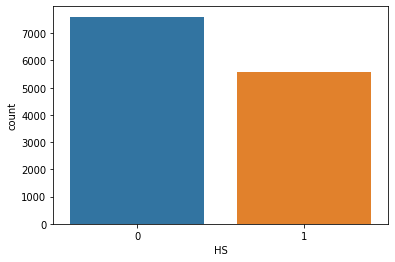

In [ ]:
import seaborn as sns
sns.countplot(x='HS', data=df)

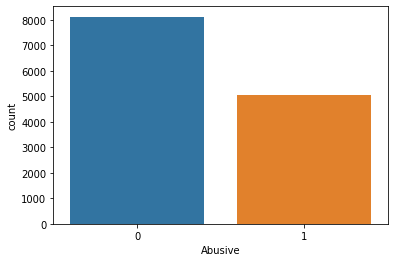

In [ ]:
sns.countplot(x='Abusive', data=df)

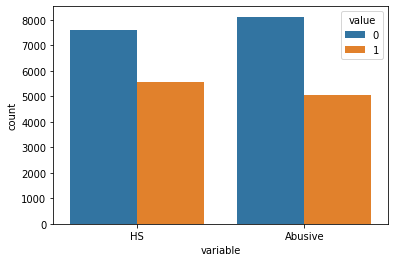

In [ ]:
sns.countplot(x="variable", hue="value", data=pd.melt(df.iloc[:,1:3]))

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#lowercase
def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    #remove number
    text = re.sub(r"\d+", "", text)
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('((@[^\s]+)|(#[^\s]+))',' ',text)
    #remove number
    text = re.sub(r"\d+", "", text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    #remove whitespace leading & trailing/ spasi
    text = text.strip()
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in stopwords.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

def preprocess(text):
    text = lowercase(text) # 1
    text = remove_unnecessary_char(text) # 2
    text = remove_nonaplhanumeric(text) # 3
    text = normalize_alay(text) # 4
    text = remove_stopword(text) # 5
    text = stemming(text) # 6
    return text

In [ ]:
df['Clean_Text'] = df['Tweet'].apply(preprocess)
df['Clean_Text']

0        cowok usaha lacak perhati gue lantas remeh per...
1        guna guna telat tau edan sarap gue gaul cigax ...
2        kadang pikir percaya tuhan jatuh kali kali kad...
3                              guna guna ku tau mata sipit
4            guna guna kaum cebong kafir dongok dungu haha
                               ...                        
13164                guna bicara ndasmu congor kate anjing
13165                               guna kasur enak kunyuk
13166               guna hati hati bisu bosan duh xfxfxxaa
13167    guna guna guna guna bom real mudah deteksi bom...
13168                         guna situ foto ya kutil onta
Name: Clean_Text, Length: 13169, dtype: object

In [ ]:
# ------ Tokenizing ---------
import nltk
nltk.download('punkt')
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 

# NLTK word tokenize 
def word_tokenize_wrapper(text):
  return word_tokenize(text)

df['tweet_tokens'] = df['Clean_Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['tweet_tokens'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Tokenizing Result : 

0    [cowok, usaha, lacak, perhati, gue, lantas, re...
1    [guna, guna, telat, tau, edan, sarap, gue, gau...
2    [kadang, pikir, percaya, tuhan, jatuh, kali, k...
3                   [guna, guna, ku, tau, mata, sipit]
4    [guna, guna, kaum, cebong, kafir, dongok, dung...
Name: tweet_tokens, dtype: object






In [ ]:
df.to_csv('data_clean.csv')

In [ ]:
#install scikit-learn library
!pip install -U scikit-learn

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer 

In [ ]:
max_features = 1000
databaru= df['tweet_tokens'].astype(str)

#menambahkan ngram=(1,2) dst kalo mau pake pemisahan per 2 kata atau lebih
tfidf = TfidfVectorizer(max_features=max_features, ngram_range=(1,3), smooth_idf=False)
tfs = tfidf.fit_transform(databaru)
IDF_vector = tfidf.idf_

# hitung TF x IDF sehingga dihasilkan TFIDF matrix / vector
tfidf_mat = tfidf.fit_transform(databaru).toarray()

In [ ]:
X= tfidf_mat

In [ ]:
tweet_labels = df[["HS", "Abusive"]]
tweet_labels.head()

,HS,Abusive
0,1,1
1,0,1
2,0,0
3,0,0
4,1,1


In [ ]:
y = tweet_labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
clasfc= OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))
cl= clasfc.fit(X_train,y_train)
y_pred= cl.predict(X_test)
y_pred

array([[1, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [0, 1]])

In [ ]:
from sklearn.metrics import accuracy_score
print('Test accuracy is {}'.format(accuracy_score(y_test, y_pred)))

Test accuracy is 0.7038724373576309


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[[1315  201]
  [ 340  778]]

 [[1457  189]
  [ 172  816]]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1118
           1       0.81      0.83      0.82       988

   micro avg       0.80      0.76      0.78      2106
   macro avg       0.80      0.76      0.78      2106
weighted avg       0.80      0.76      0.78      2106
 samples avg       0.45      0.43      0.43      2106



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
